In [1]:
import requests
user_id = 200128311

with open('MP_api_key.ini','r') as content_file:
    api_key = content_file.read()

url = 'https://www.mountainproject.com/data/get-user?userId='+str(user_id)+'&key='+api_key
     
r = requests.get(url)
json_data = r.json()

In [14]:
print(len(mpr.df_users), len(mpr.df_users.columns), mpr.df_users.isnull().sum().sum(), mpr.df_users.notnull().sum().sum())

12984 21747 282112318 250730


In [15]:
250730.0/282112318.0

0.0008887594904664886

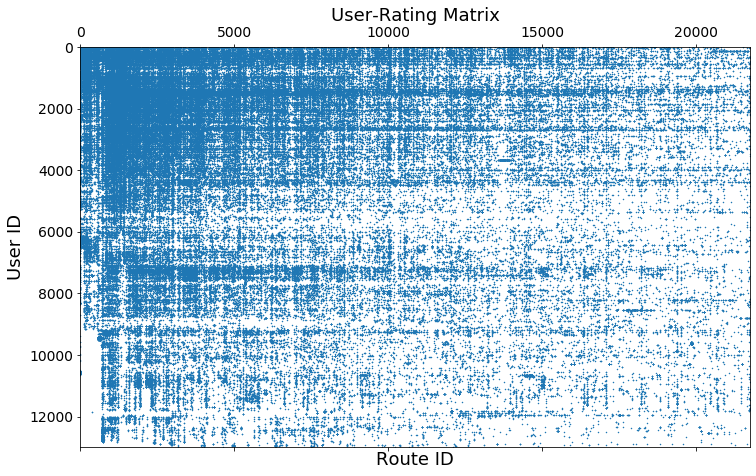

In [6]:
from MPR import MP_Recommender

with open('MP_api_key.ini','r') as content_file:
    api_key = content_file.read()

mpr = MP_Recommender('user_table.p','route_table.p',api_key,verbatim=True)

In [2]:
user_id = 111344588
mpr.load_prev_content_results('similarity_results.p')
mpr.get_user_recs(user_id)

recommendations for  Jonathan Wong ( 111344588 ):
1 )  109226599 Beak Mantle ,  V4 ,  ( Boulder ),    pitches,  location:  ['California', 'San Francisco Bay Area', 'Castle Rock Area', '* Castle Rock Area Bouldering', 'Castle Rock Loop', 'Magoos', 'The Beak'] ,  url:  https://www.mountainproject.com/route/109226599/beak-mantle
2 )  114054755 The McNugget ,  V5 ,  ( Boulder ),    pitches,  location:  ['California', 'Sierra Eastside', 'Bishop Area', 'Buttermilk Country', 'Bardini Boulders', 'The McNugget'] ,  url:  https://www.mountainproject.com/route/114054755/the-mcnugget
3 )  109256400 The Slope ,  V4- ,  ( Boulder ),    pitches,  location:  ['California', 'San Francisco Bay Area', 'Castle Rock Area', '* Castle Rock Area Bouldering', 'Castle Rock Loop', 'Magoos', 'Dog Dish Boulders'] ,  url:  https://www.mountainproject.com/route/109256400/the-slope
4 )  106129151 Checkerboard ,  V7-8 ,  ( Boulder ),    pitches,  location:  ['California', 'Sierra Eastside', 'Bishop Area', 'Buttermilk 

In [13]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

user_ids = []
frames = []
verbatim = True

user_id_dict = pickle.load( open( 'user_table.p', "rb" ) )

for user_id, d in user_id_dict.items():
    user_ids.append(user_id)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))

df = pd.concat(frames, keys=user_ids)

df2 = df.unstack(level=-1)
df3 = df2[0]

#pd DF of the users (user id as index) with their associated ratings by route_id
df3.index.name = 'user_id'
df_users = df3

#convert to numpy array for possible visualization
user_rating_mat = df_users.to_numpy().copy()
user_rating_mat[np.isnan(user_rating_mat)] = 0.0

if verbatim:
    fig = plt.figure(figsize=(12,10))
    plt.spy(user_rating_mat,markersize=0.5)
    plt.xlabel('Route ID',fontsize=18)
    plt.ylabel('User ID',fontsize=18)
    plt.title('User-Rating Matrix',fontsize=18)
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    fig.savefig('sparsity.png') # Use fig. here
    plt.show()

#get users who have rated at least n=15 routes
ind_users_at_least20 = []

dim = user_rating_mat.shape
for u in range(dim[0]):
    n = len(user_rating_mat[u,:].nonzero()[0])
    if n >= 15:
        ind_users_at_least20.append(u)

#print(df_users.index[ind_users_at_least20])

df_users_at_least20 = df_users.loc[df_users.index[ind_users_at_least20]]

df20=df_users_at_least20.stack()
df20 = df20.reset_index()
df20.columns = ['user_id','route_id','rating']
#Pandas DF that has user_id, route_id, and rating; i.e., all the users and their ratings
df20 = df20

<Figure size 1200x1000 with 1 Axes>

In [24]:
import requests
user_id = 200128311

with open('MP_api_key.ini','r') as content_file:
    mp_api_key = content_file.read()

url = 'https://www.mountainproject.com/data/get-user?userId='+str(user_id)+'&key='+mp_api_key

r = requests.get(url)
json_data = r.json()

user_name = json_data['name']
user_avatar_url = json_data['avatar']

user_routes_rated = df_users.iloc[df_users.index.get_loc(user_id),:]

user_routes_rated = user_routes_rated[user_routes_rated.notnull()]
n_rated = len(user_routes_rated)

user_routes_rated.sort_values(axis=0,ascending=False,inplace=True)
if n_rated >= 5:
    top_rated = user_routes_rated[0:4]
else:
    top_rated = user_routes_rated

recs = []
if n_rated >= 15:
    load_prev_colab_results(user_id)
    top2_mf = self.df_top_climbs_mf[:,1].to_numpy()

    for i in range(3):
        recs.append(self.get_content_recs(top_rated[i]).to_numpy()[0])
        recs.append(top2_mf[0])
        recs.append(top2_mf[1])
else:
    for i in range(5):
        recs.append(self.get_content_recs(top_rated[i]).to_numpy()[0])

if self.verbatim:
    print('recommendations for ',user_name, '(',str(user_id),'):')
    print(*recs,'\n')

In [35]:
user_routes_rated[0:5].to_numpy()

array([4., 3., 3., 3., 2.])